# Shinkansen Travel Experience

### Dataset:
The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.
*   **Train_Data**
*   **Test_Data**

**Target Variable**: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.


### Goal:
The goal of the problem is to **predict whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train.

### **Import necessary libaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Preprocessing and Overview
*   Sanity checks : Check that the customer ID is unique for all datasets
*   Merge Survey and Travel datasets on Customer ID

In [ ]:
#Load the Dataset
survey_test = pd.read_csv('/content/drive/MyDrive/MIT IDSS/ReLu not Delulu_Hackathon /Data/Test/Surveydata_test.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/MIT IDSS/ReLu not Delulu_Hackathon /Data/Test/Traveldata_test.csv')
survey_train = pd.read_csv('/content/drive/MyDrive/MIT IDSS/ReLu not Delulu_Hackathon /Data/Train/Surveydata_train.csv')
travel_train = pd.read_csv('/content/drive/MyDrive/MIT IDSS/ReLu not Delulu_Hackathon /Data/Train/Traveldata_train.csv')

In [ ]:
print(f"The number of unique customer ID is {survey_train['ID'].nunique()} and the survey_train dataset has {survey_train.shape[0]} rows")

The number of unique customer ID is 94379 and the survey_train dataset has 94379 rows


In [ ]:
print(f"The number of unique customer ID is {travel_train['ID'].nunique()} and the travel_train dataset has {travel_train.shape[0]} rows")

The number of unique customer ID is 94379 and the travel_train dataset has 94379 rows


There are no duplicates in the customer ID for both travel and survey train dataset

In [ ]:
#Merge train dataset
train_df = pd.merge(survey_train, travel_train, on='ID', how='inner')
train_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [ ]:
# Check for missing values
train_df.isnull().sum()

,0
ID,0
Overall_Experience,0
Seat_Comfort,61
Seat_Class,0
Arrival_Time_Convenient,8930
Catering,8741
Platform_Location,30
Onboard_Wifi_Service,30
Onboard_Entertainment,18
Online_Support,91


In [ ]:
# Checking for duplicate values in ID feature
survey_test['ID'].duplicated().sum()

0

In [ ]:
print(f"The number of unique customer ID is {survey_test['ID'].nunique()} and the survey_test dataset has {survey_test.shape[0]} rows")

The number of unique customer ID is 35602 and the survey_test dataset has 35602 rows


In [ ]:
# Checking for duplicate values in ID feature
travel_test['ID'].duplicated().sum()

0

In [ ]:
print(f"The number of unique customer ID is {travel_test['ID'].nunique()} and the travel_train dataset has {travel_test.shape[0]} rows")

The number of unique customer ID is 35602 and the travel_train dataset has 35602 rows


There are no duplicates in the customer ID for both travel and survey test dataset

In [ ]:
#Merge test dataset
test_df = pd.merge(survey_test, travel_test, on='ID', how='inner')
test_df.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_Location        35590 non-null  object 
 6   Onboard_Wifi_Service     35590 non-null  object 
 7   Onboard_Entertainment    35594 non-null  object 
 8   Online_Support           35576 non-null  object 
 9   Ease_of_Online_Booking   35584 non-null  object 
 10  Onboard_Service          32730 non-null  object 
 11  Legroom                  35577 non-null  object 
 12  Baggage_Handling         35562 non-null  object 
 13  CheckIn_Service          35580 non-null  object 
 14  Cleanliness           

In [ ]:
# Check for missing values
test_df.isnull().sum()

,0
ID,0
Seat_Comfort,22
Seat_Class,0
Arrival_Time_Convenient,3325
Catering,3357
Platform_Location,12
Onboard_Wifi_Service,12
Onboard_Entertainment,8
Online_Support,26
Ease_of_Online_Booking,18


### **Exploratory Data Analysis (EDA)**


#### **2.Univariate analysis - Numeric data**

In [ ]:
train_df_copy = train_df.copy()

ID is an identifier which is unique for each customer and we can drop this column as it would not add any value to our analysis.

In [ ]:
#drop ID
# Dropping ID column
train_df_copy=train_df_copy.drop(['ID'],axis=1)

In [ ]:
train_df_copy.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
train_df_copy.describe()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,94379.000000,94346.000000,94379.000000,94322.000000,94022.000000
mean,0.546658,39.419647,1978.888185,14.647092,15.005222
std,0.497821,15.116632,1027.961019,38.138781,38.439409
min,0.000000,7.000000,50.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,0.000000,0.000000
50%,1.000000,40.000000,1923.000000,0.000000,0.000000
75%,1.000000,51.000000,2538.000000,12.000000,13.000000
max,1.000000,85.000000,6951.000000,1592.000000,1584.000000


In [ ]:
# Creating numerical variables
num_cols=['Overall_Experience','Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']

# Creating categorical variables
# Include target variable in both categorical variable
cat_cols_passanger= ['Overall_Experience','Gender','Customer_Type','Type_Travel','Travel_Class', 'Seat_Class']
cat_cols_survey = ['Overall_Experience','Platform_Location','Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

Overall_Experience
Skew : -0.19
Mode: 1


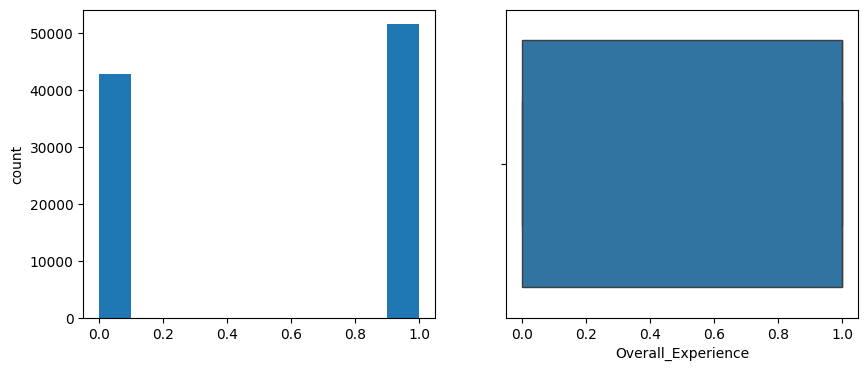

Age
Skew : -0.0
Mode: 39.0


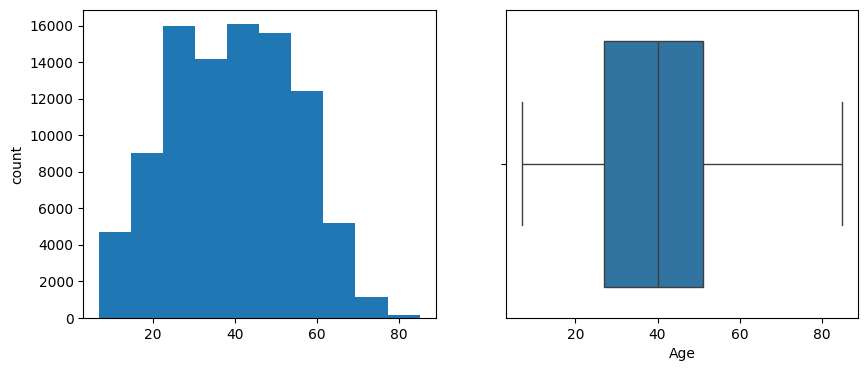

Travel_Distance
Skew : 0.47
Mode: 1963


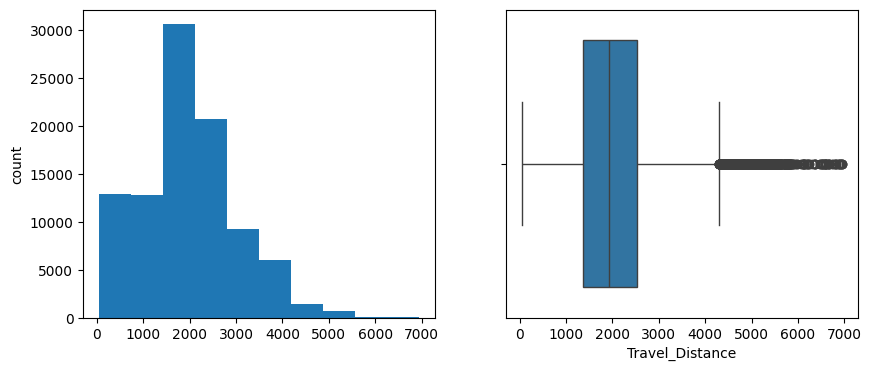

Departure_Delay_in_Mins
Skew : 7.16
Mode: 0.0


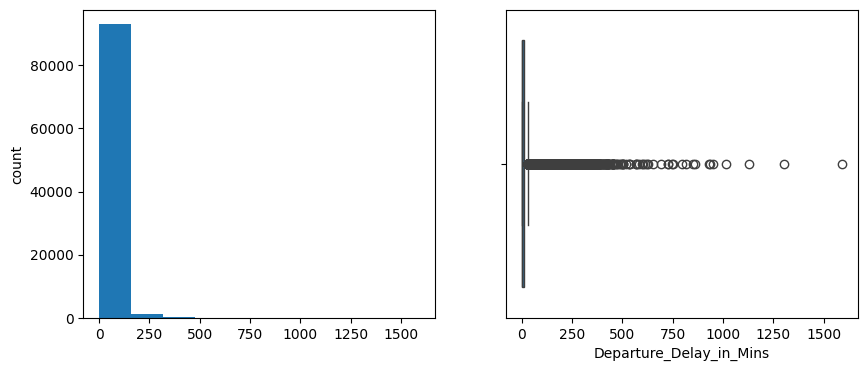

Arrival_Delay_in_Mins
Skew : 6.98
Mode: 0.0


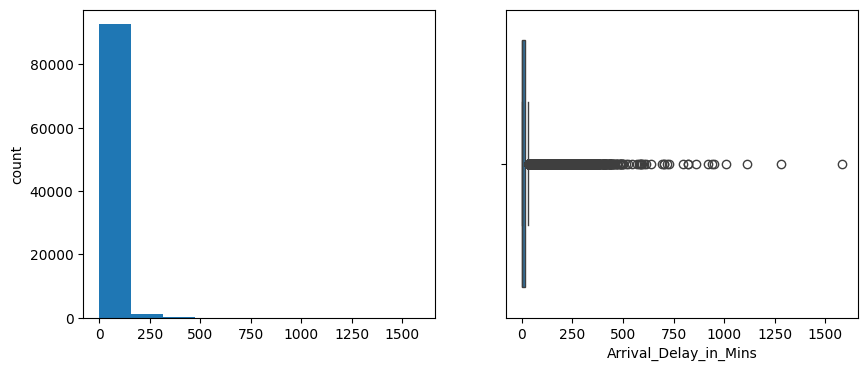

In [ ]:

#visualize the distribution for numerical variables

for col in num_cols:
    print(col)
    print('Skew :',round(train_df_copy[col].skew(),2))
    print('Mode:',train_df_copy[col].mode()[0])
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    train_df_copy[col].hist(bins=10,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=train_df_copy[col])
    plt.show()

#### **Observation**
*   Distribution of age is slightly right skewed with half of the lead population between 27 and 51 years old approximately
*   Distribution of Travel_Distance is normal with many outliers above 4200


#### **2.Univariate analysis - Categorical data**

In [ ]:
print(train_df_copy['Overall_Experience'].value_counts())

Overall_Experience
1    51593
0    42786
Name: count, dtype: int64


In [ ]:
 # Printing the % sub categories of each category
for i in cat_cols_passanger:
    print(train_df_copy[i].value_counts(normalize=True))
    print('*'*40)

Overall_Experience
1    0.546658
0    0.453342
Name: proportion, dtype: float64
****************************************
Gender
Female    0.507041
Male      0.492959
Name: proportion, dtype: float64
****************************************
Customer_Type
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: proportion, dtype: float64
****************************************
Type_Travel
Business Travel    0.688373
Personal Travel    0.311627
Name: proportion, dtype: float64
****************************************
Travel_Class
Eco         0.522807
Business    0.477193
Name: proportion, dtype: float64
****************************************
Seat_Class
Green Car    0.502601
Ordinary     0.497399
Name: proportion, dtype: float64
****************************************


In [ ]:
 # Printing the % sub categories of each category
for i in cat_cols_survey:
    print(train_df_copy[i].value_counts(normalize=True))
    print('*'*40)

Overall_Experience
1    0.546658
0    0.453342
Name: proportion, dtype: float64
****************************************
Platform_Location
Manageable           0.256208
Convenient           0.232244
Needs Improvement    0.189000
Inconvenient         0.174342
Very Convenient      0.148184
Very Inconvenient    0.000021
Name: proportion, dtype: float64
****************************************
Seat_Comfort
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: proportion, dtype: float64
****************************************
Arrival_Time_Convenient
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: proportion, dtype: float64
****************************************
Catering
Acceptable           0.215652
Needs Improvement    0.

In [ ]:
# Write a function will create barplots that indicate percentage for each category
def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()  # Show the plot

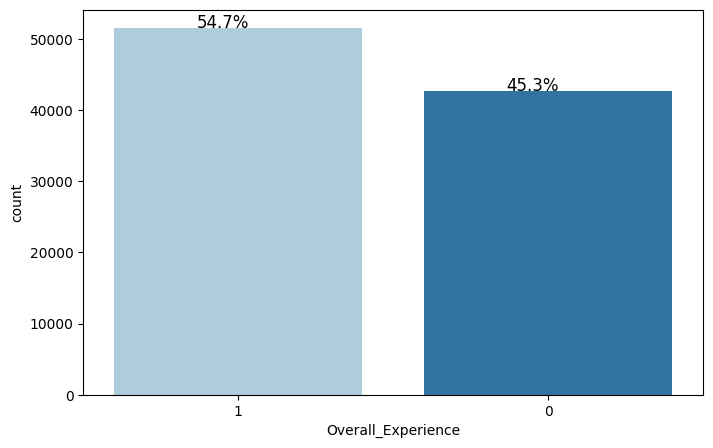

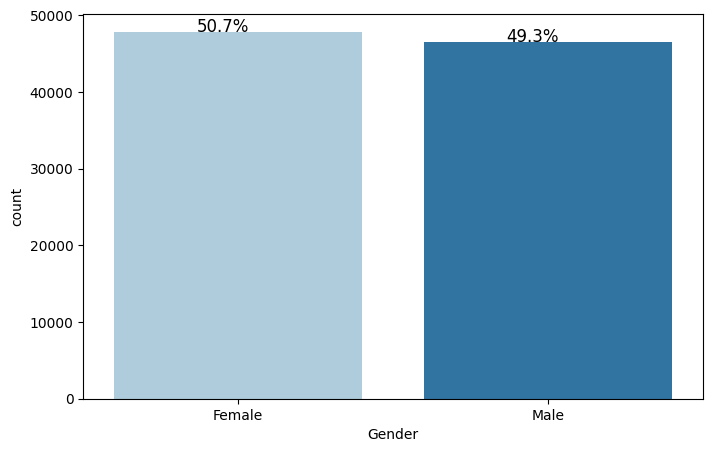

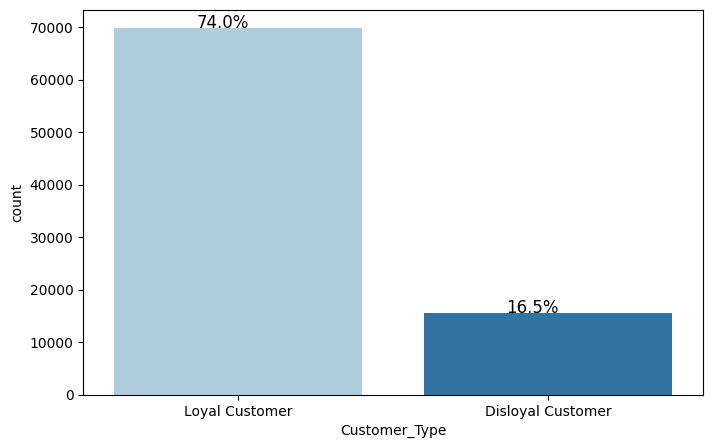

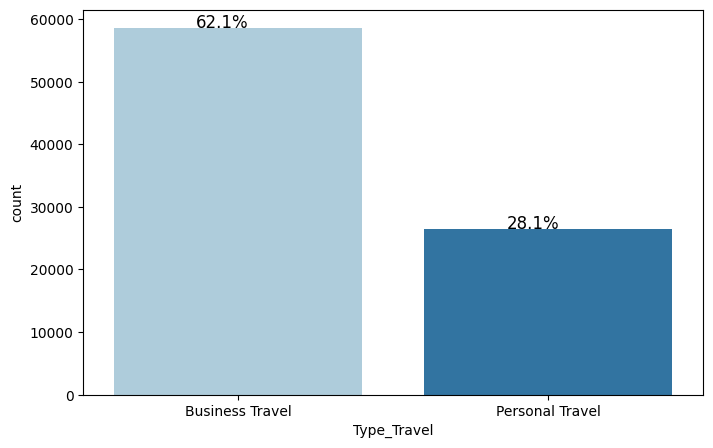

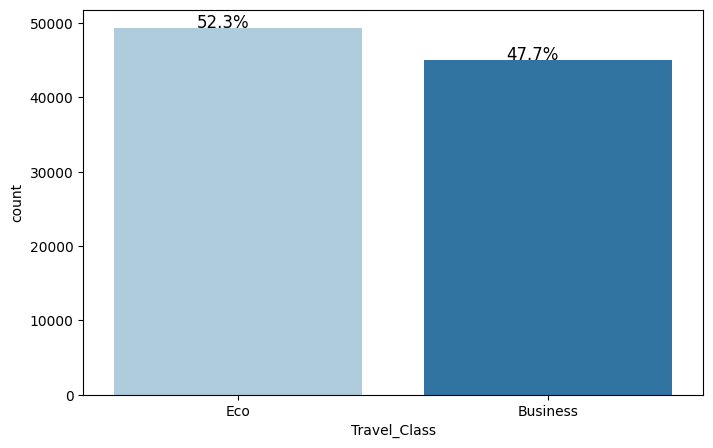

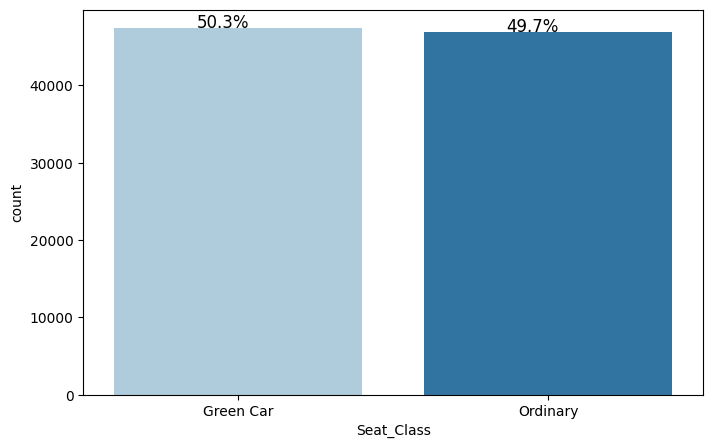

In [ ]:
for col in cat_cols_passanger:
  perc_on_bar(train_df_copy, col)

**Observation**
*Categorical variables concerning passengers*
*   There are almost as many Female 50.7% passengers as Male 49.3% passengers
74% are loyal customers 16.5% are disloyal customer
*   Most of the passengers use the train for business travel 62.1%  and personal travel 28.1%
*   Most of the passengers 52.3% travel economy class and 47.7% travels business class
*   50.3% are Green Car passengers and 49.7% are Ordinary passengers

**Notes**: Most of the passengers use the trains for business with their travels funded by the company. There are almost as many business class as economy class.
Many of the passengers would top up the fare for the Green car




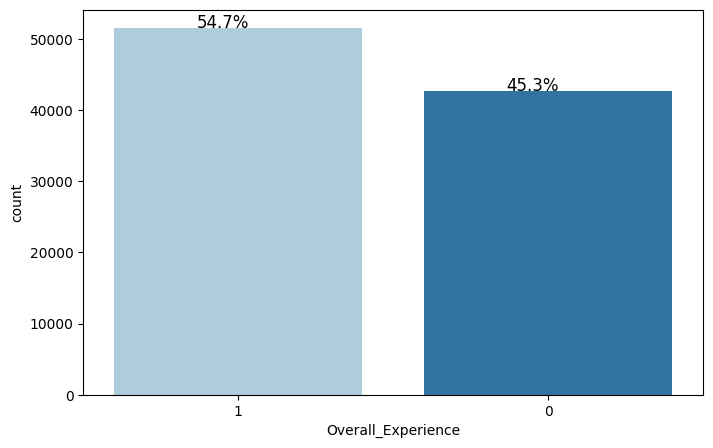

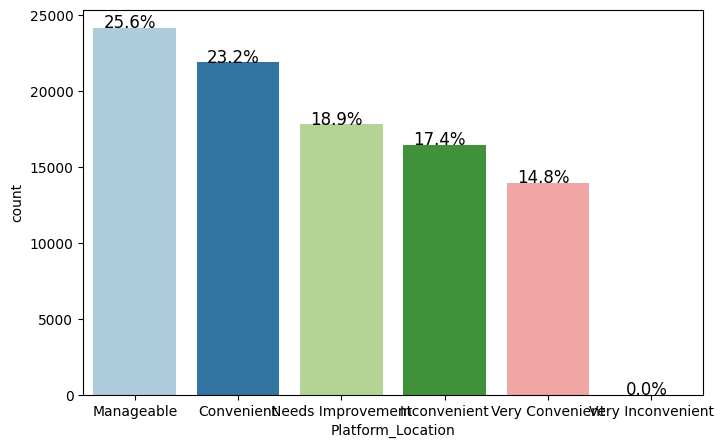

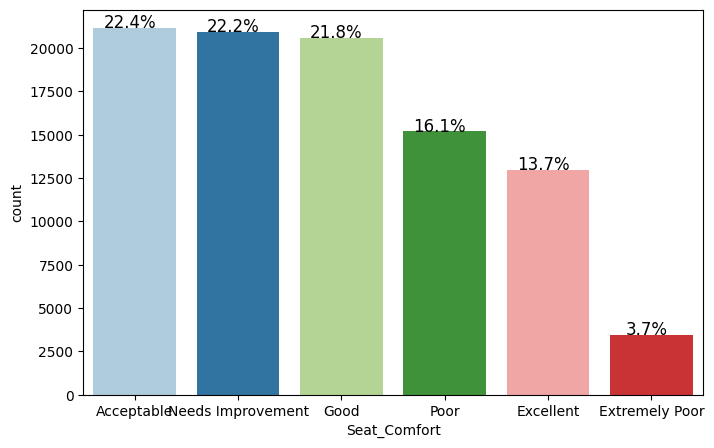

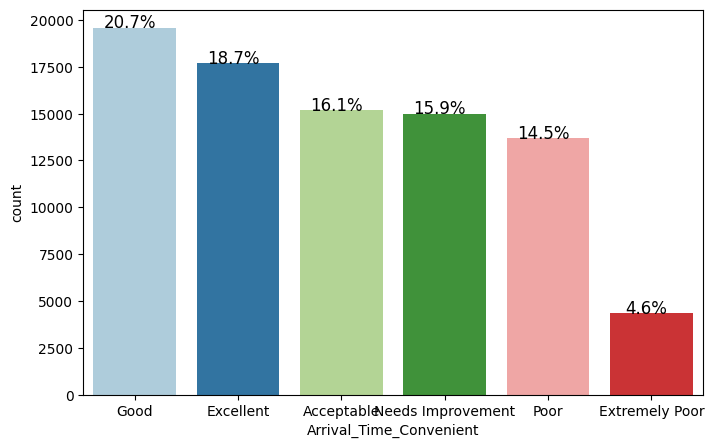

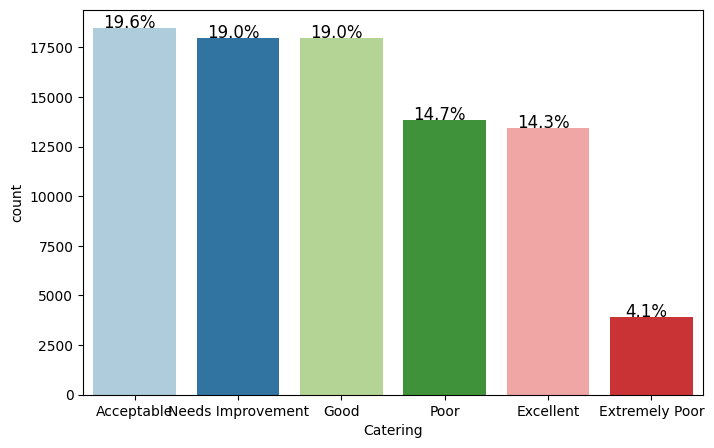

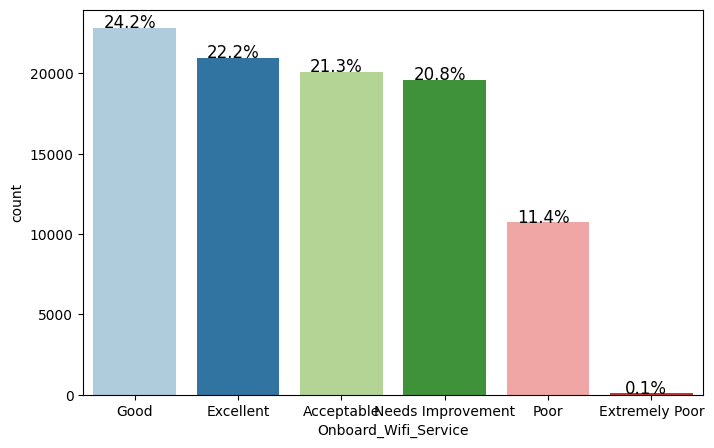

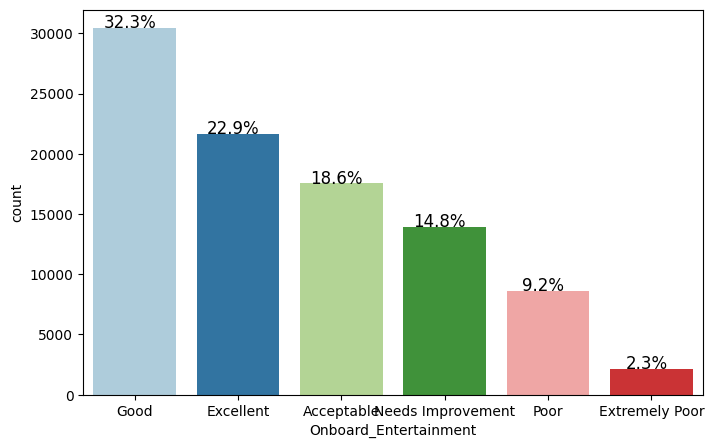

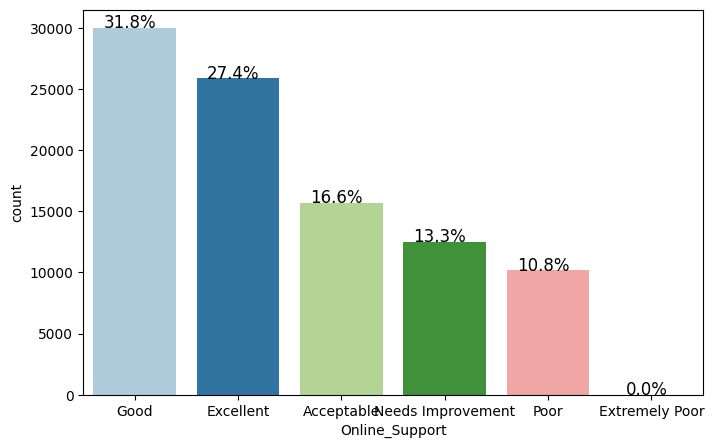

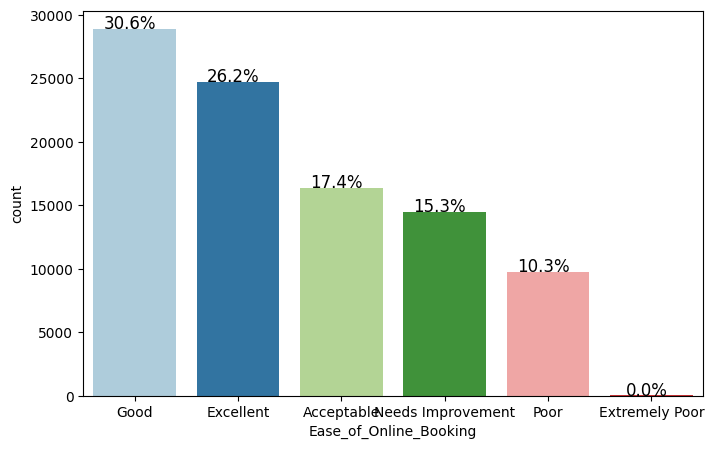

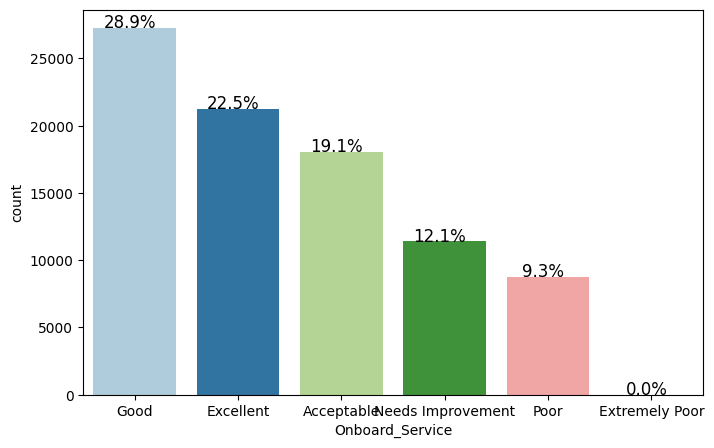

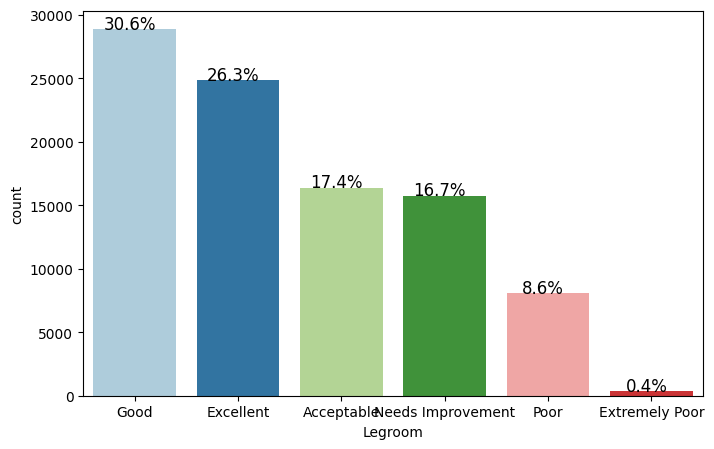

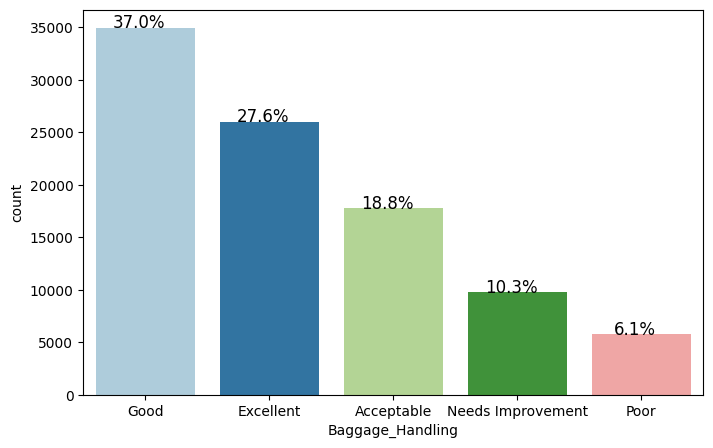

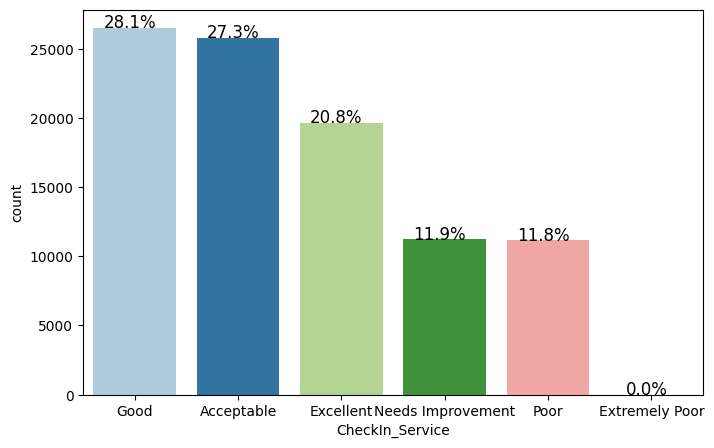

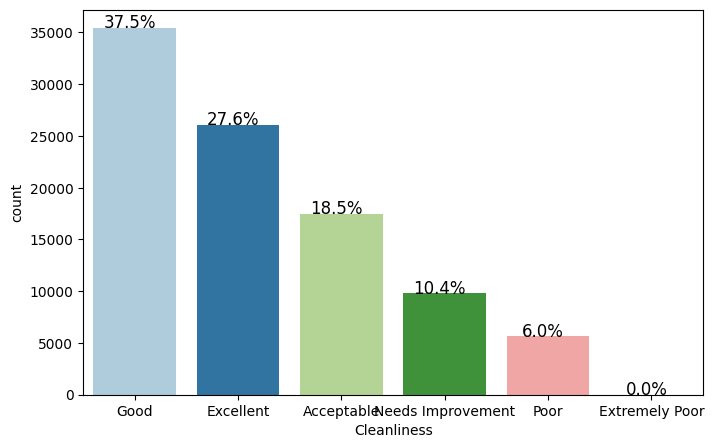

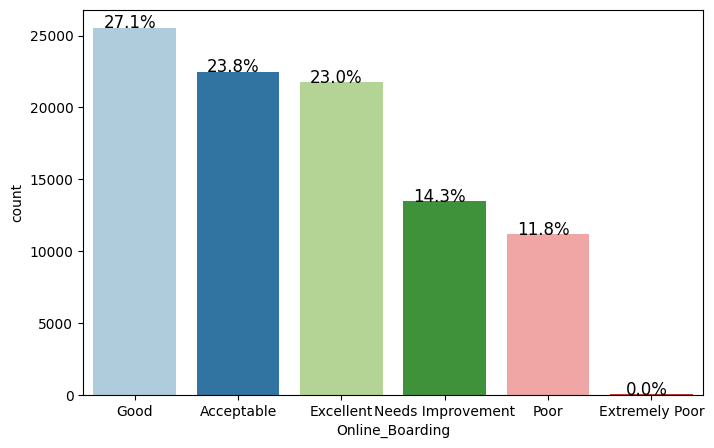

In [ ]:
for col in cat_cols_survey:
  perc_on_bar(train_df_copy, col)

**Observation**
*Categorical variables concerning surveys*

*   List item
*   List item

**Notes**:

#### **Bivariate analysis**

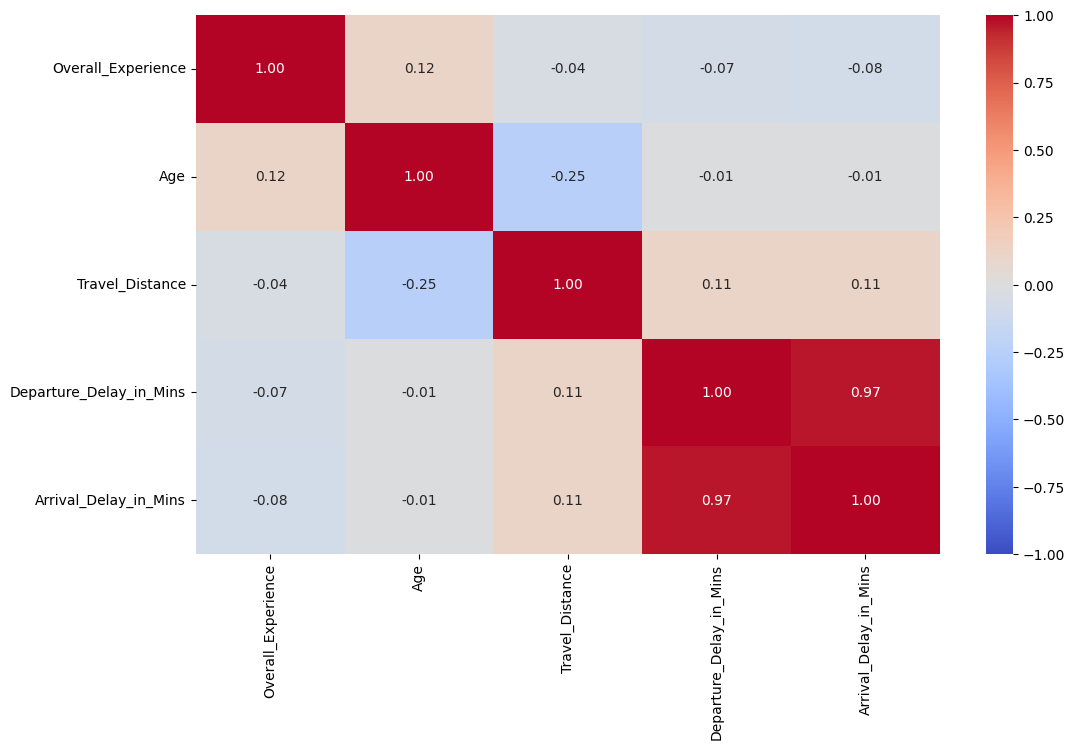

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(train_df_copy[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f',cmap = 'coolwarm')
plt.show()

**Observations:**

*    There is a strong relationship between arrival delay and departure delay this is not surprising
*    there is a slight negative correlationsip between age and travel distance

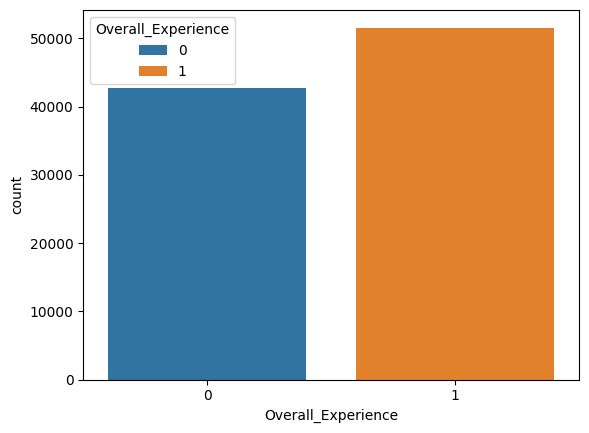

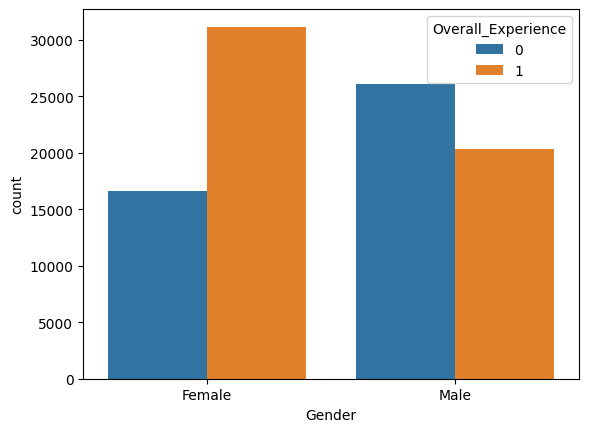

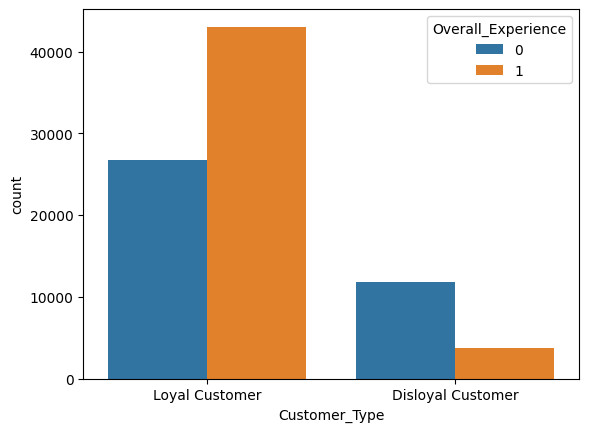

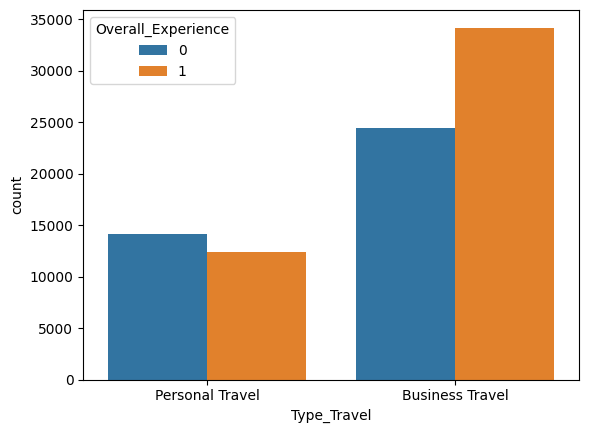

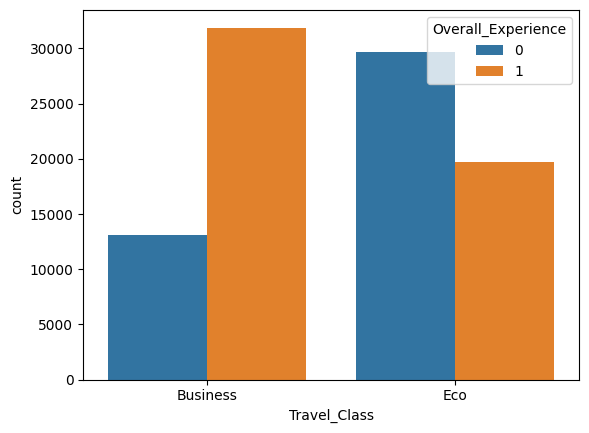

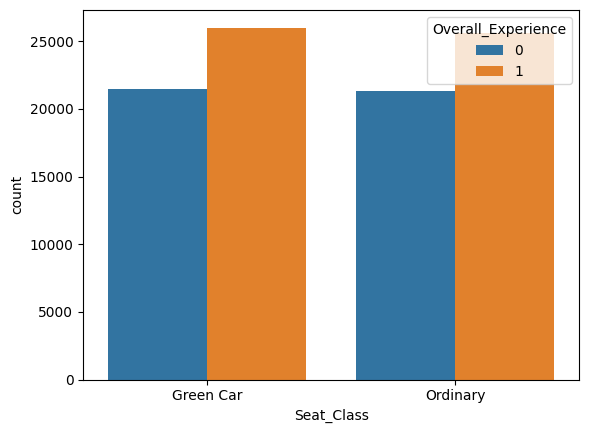

In [ ]:
# analyzing categorical independent variables with the dependent variable

for col in cat_cols_passanger:
    sns.countplot(x = col, hue = 'Overall_Experience', data = train_df_copy)
    plt.show()


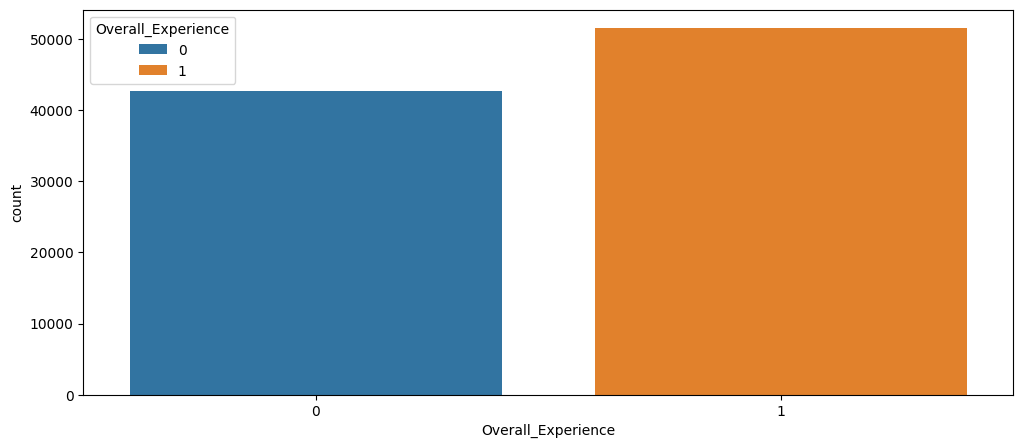

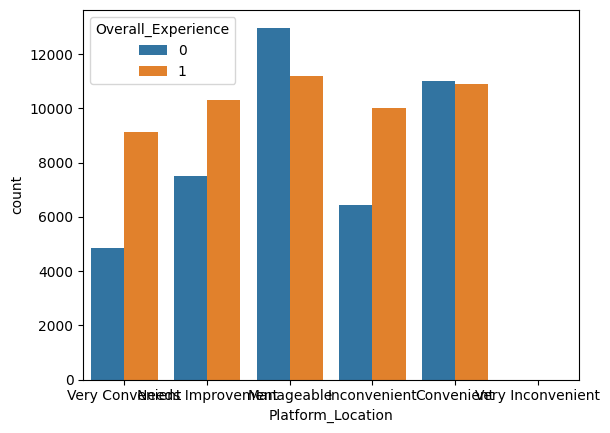

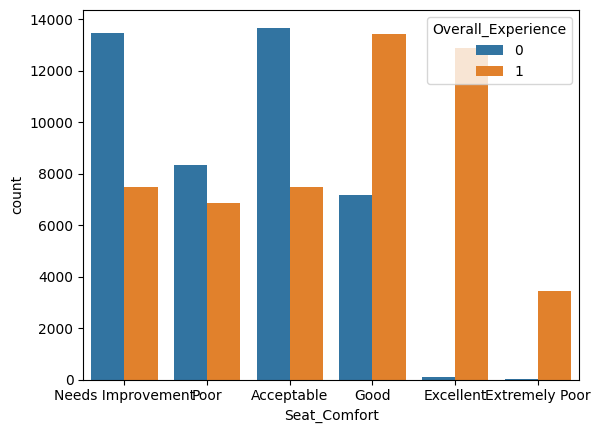

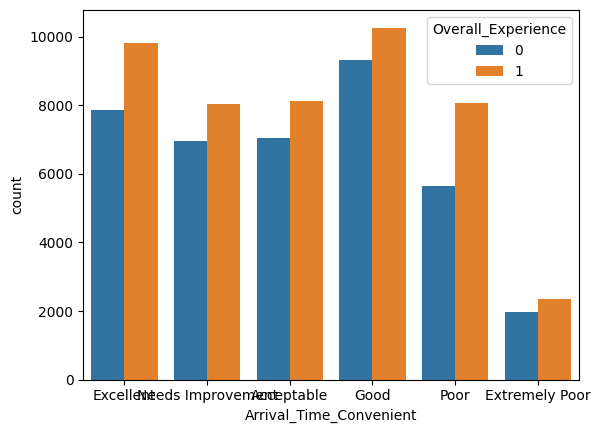

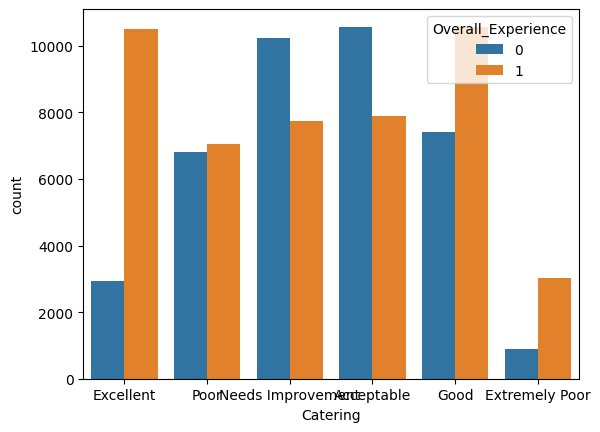

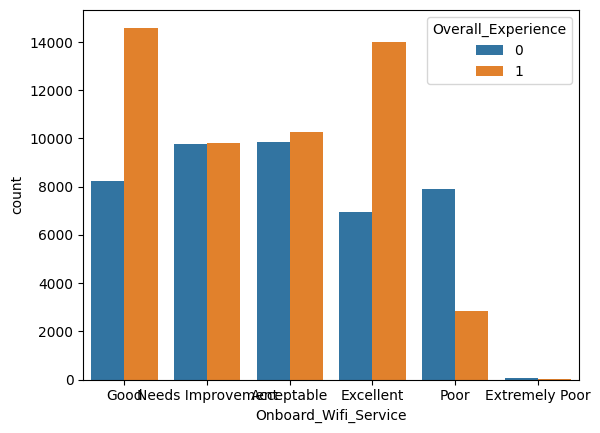

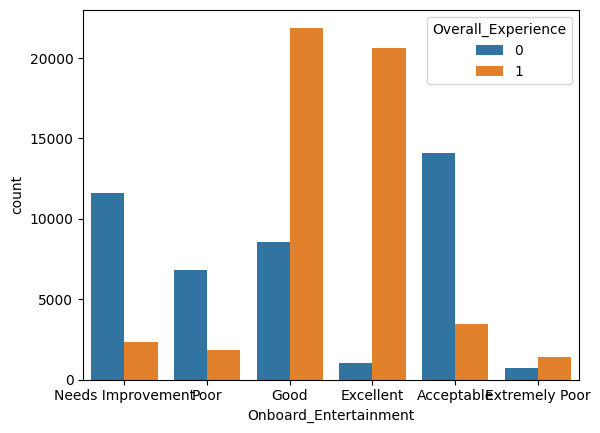

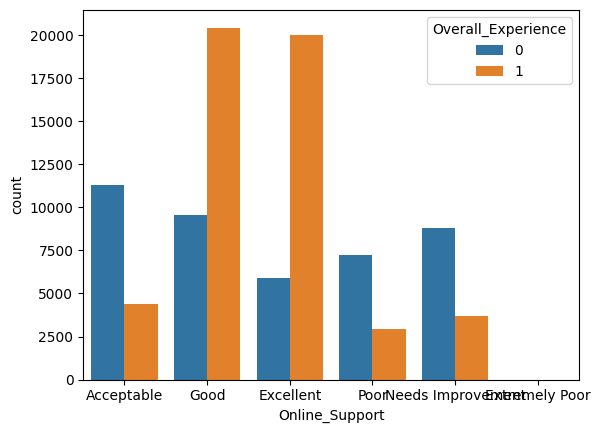

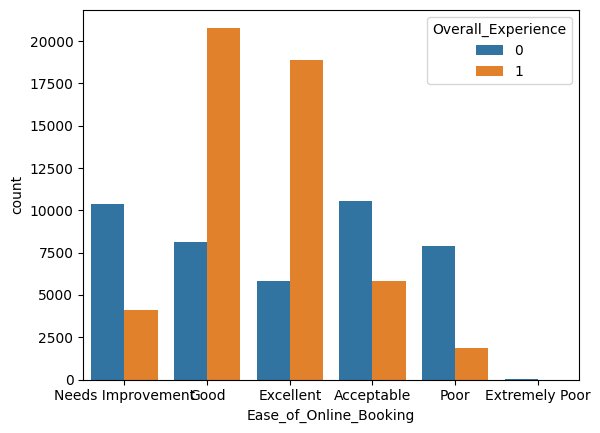

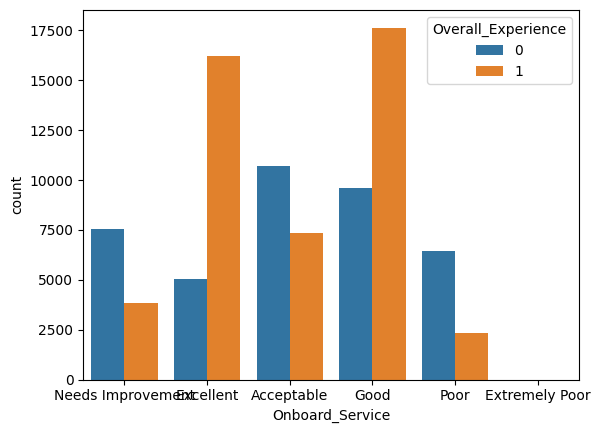

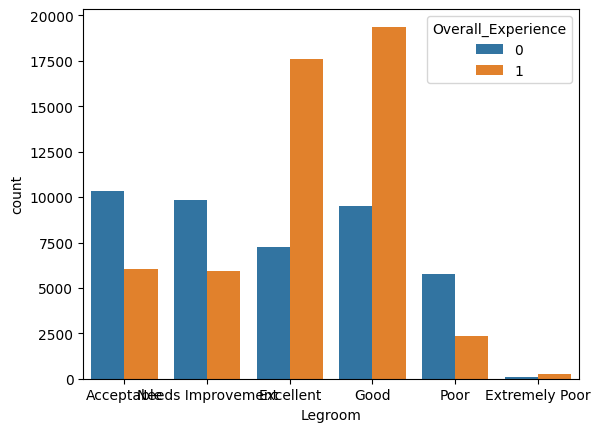

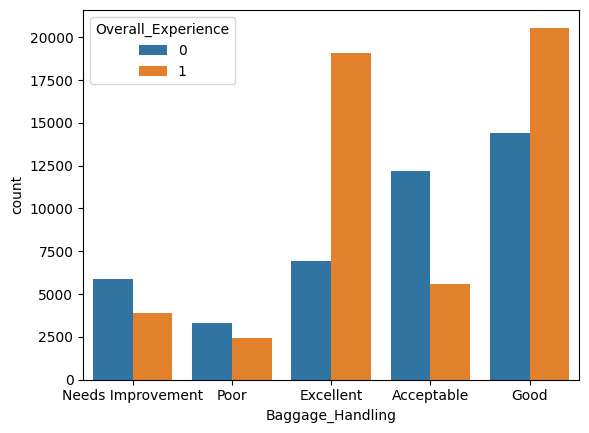

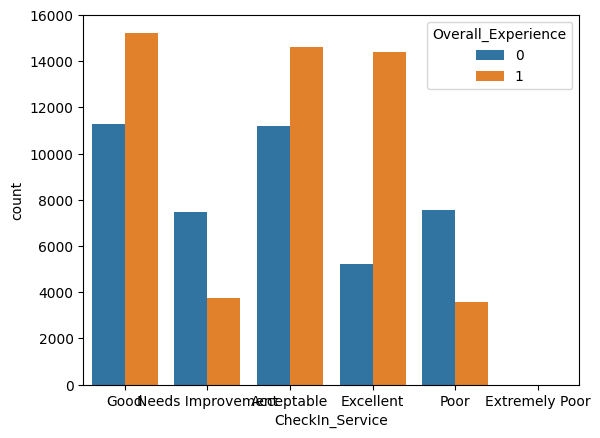

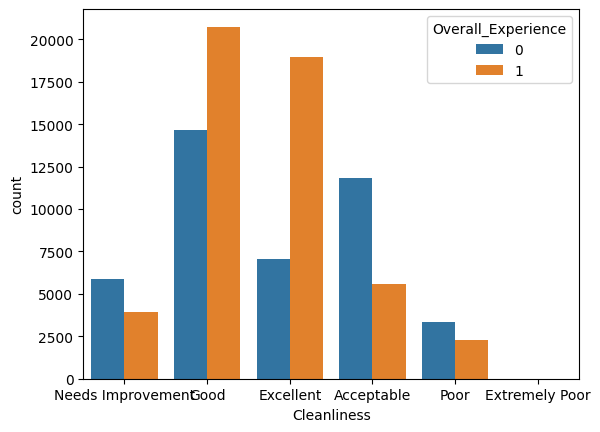

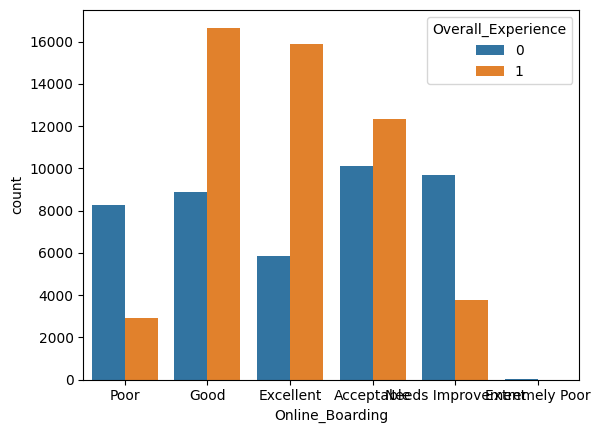

In [ ]:
# analyzing categorical independent variables with the dependent variable

plt.figure(figsize=(12, 5))
for col in cat_cols_survey:
    sns.countplot(x = col, hue = 'Overall_Experience', data = train_df_copy)
    plt.show()


**Observations:**
Categorical columns related to travel data

*    Female customers tend to be more satisfied than male customers
*    Loyal customer are more satisfied than disloyal customers
*    People who are on business travel are more satisfied with the service than *    people who are on personal travel
*    Business class customers are more satisfied than Economy class
*    There is no differernce in oversatisfaction from people who travel in green car or ordinary seats

Summary: People who are travelling for business on the Shinkansen are generally more satisfied than people who travel for personal reasons. Cost of travel is usually covered by the company if it is business travel, cost of the fares would not matter.
Female passengers are generally also more satisfied than male passengers. It could be that the Shinkansen is best equipted for business travel and that the passenger seats are more sutiable for smaller framed female passengers and not so for male passengers. People who require more room should upgrade to business class

**Observations**:



*   List item
*   List item

**Summary**

### **Data Preparation for Model Building**

In [ ]:
train_df_copy.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
# Creating list of dummy columns
to_get_dummies_for_train = ['Gender','Customer_Type','Type_Travel','Travel_Class', 'Seat_Class']
to_get_dummies_for_test = ['Gender','Customer_Type','Type_Travel','Travel_Class', 'Seat_Class']



In [ ]:
# Creating dummy variables
train_df_copy = pd.get_dummies(data = train_df_copy, columns = to_get_dummies_for_train, drop_first = True)

In [ ]:
train_df_copy.head()

,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Online_Boarding,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,0,Needs Improvement,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,...,Poor,52.0,272,0.0,5.0,False,True,False,False,False
1,0,Poor,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,...,Good,48.0,2200,9.0,0.0,True,True,True,True,True
2,1,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,...,Excellent,43.0,1061,77.0,119.0,False,True,False,False,False
3,0,Acceptable,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,...,Acceptable,44.0,780,13.0,18.0,False,True,False,False,True
4,1,Acceptable,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,...,Good,50.0,1981,0.0,0.0,False,True,False,False,True


In [ ]:
# Mapping survey
dict_Platform_Location = {'Very Inconvenient': 0, 'Inconvenient':1, 'Needs Improvement': 2, 'Manageable ':3,'Convenient': 4, 'Very Convenient': 5}
dict_survey5 = {'Extremely Poor': 0, 'Poor':1, 'Needs Improvement': 2, 'Acceptable ':3,'Good': 4, 'Excellent': 5}
dict_Baggage_Handling = {'Poor':0, 'Needs Improvement': 1, 'Acceptable ':2,'Good': 3, 'Excellent': 4}

In [ ]:
train_df_copy['Platform_Location']= train_df_copy.Platform_Location.map(dict_Platform_Location)
train_df_copy['Seat_Comfort']= train_df_copy.Seat_Comfort.map(dict_survey5)
train_df_copy['Arrival_Time_Convenient']= train_df_copy.Arrival_Time_Convenient.map(dict_survey5)
train_df_copy['Catering']= train_df_copy.Catering.map(dict_survey5)
train_df_copy['Onboard_Wifi_Service']= train_df_copy.Onboard_Wifi_Service.map(dict_survey5)
train_df_copy['Onboard_Entertainment']= train_df_copy.Onboard_Entertainment.map(dict_survey5)
train_df_copy['Online_Support']= train_df_copy.Online_Support.map(dict_survey5)
train_df_copy['Ease_of_Online_Booking']= train_df_copy.Ease_of_Online_Booking.map(dict_survey5)
train_df_copy['Onboard_Service']= train_df_copy.Onboard_Service.map(dict_survey5)
train_df_copy['Legroom']= train_df_copy.Legroom.map(dict_survey5)
train_df_copy['Baggage_Handling']= train_df_copy.Baggage_Handling.map(dict_Baggage_Handling)
train_df_copy['CheckIn_Service']= train_df_copy.CheckIn_Service.map(dict_survey5)
train_df_copy['Cleanliness']= train_df_copy.Cleanliness.map(dict_survey5)
train_df_copy['Online_Boarding']= train_df_copy.Online_Boarding.map(dict_survey5)

In [ ]:
train_df_copy.head(10)

,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Online_Boarding,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,0,2.0,5.0,5.0,5.0,4.0,2.0,NaN,2.0,2.0,...,1.0,52.0,272,0.0,5.0,False,True,False,False,False
1,0,1.0,5.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,...,4.0,48.0,2200,9.0,0.0,True,True,True,True,True
2,1,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,...,5.0,43.0,1061,77.0,119.0,False,True,False,False,False
3,0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,44.0,780,13.0,18.0,False,True,False,False,True
4,1,NaN,NaN,NaN,NaN,2.0,4.0,5.0,4.0,4.0,...,4.0,50.0,1981,0.0,0.0,False,True,False,False,True
5,1,2.0,2.0,NaN,2.0,4.0,5.0,4.0,NaN,NaN,...,NaN,44.0,2810,0.0,0.0,True,True,False,False,True
6,0,4.0,5.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,...,4.0,56.0,2029,0.0,0.0,True,True,True,True,False
7,0,NaN,NaN,NaN,1.0,5.0,5.0,4.0,4.0,4.0,...,5.0,65.0,853,0.0,3.0,True,True,True,False,False
8,0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,22.0,1636,1.0,0.0,True,True,True,True,False
9,0,2.0,4.0,4.0,4.0,NaN,4.0,4.0,2.0,2.0,...,NaN,57.0,306,0.0,0.0,True,True,False,False,True


**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
# Separating target variable and other variables
Y= train_df_copy.Overall_Experience
X= train_df_copy.drop(columns = ['Overall_Experience'])

**Splitting the data into 70% train and 30% test set**

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### Building a Decisions Tree Model


In [ ]:
# Building a Decision tree model
dt = DecisionTreeClassifier(random_state=1)

# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Let's check the model performance of decision tree** <br>
create a function to calculate and print the classification report and confusion matrix

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Checking performance on the training dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



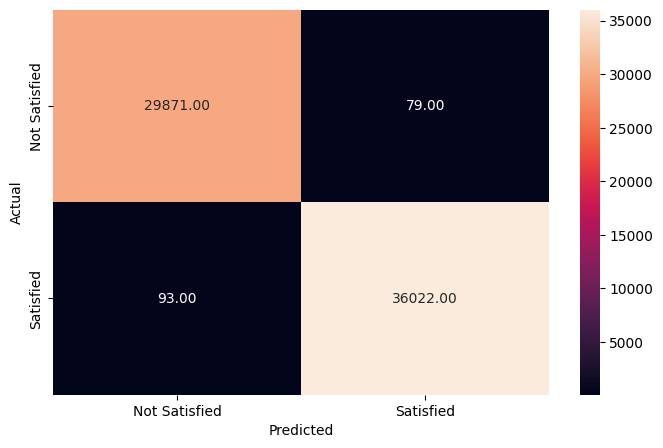

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:** <br>
*     Model has performed very well on the training set.

**Checking performance on the test dataset**

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12836
           1       0.93      0.93      0.93     15478

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



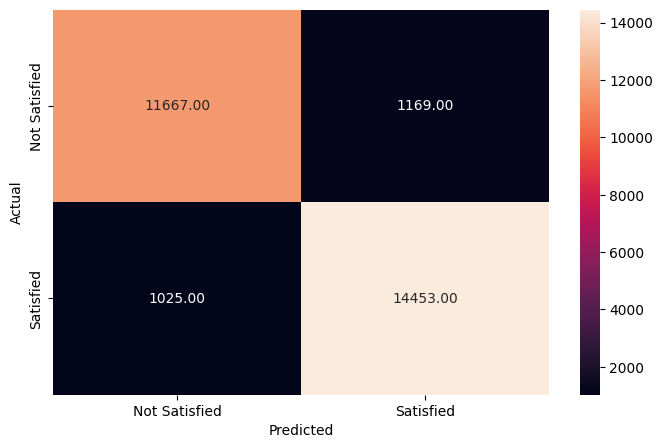

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

*    The Decision Tree is slightly overfitting the training data
*    recall is 0.93 in test data in comparison to 1 for the training dataset

**Perform hyperparameter tuning for the decision tree model using GridSearch CV** <br>
Tune the decision tree to reduce overfitting

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, max_leaf_nodes=250, min_samples_split=50,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     29950
           1       0.95      0.94      0.95     36115

    accuracy                           0.94     66065
   macro avg       0.94      0.94      0.94     66065
weighted avg       0.94      0.94      0.94     66065



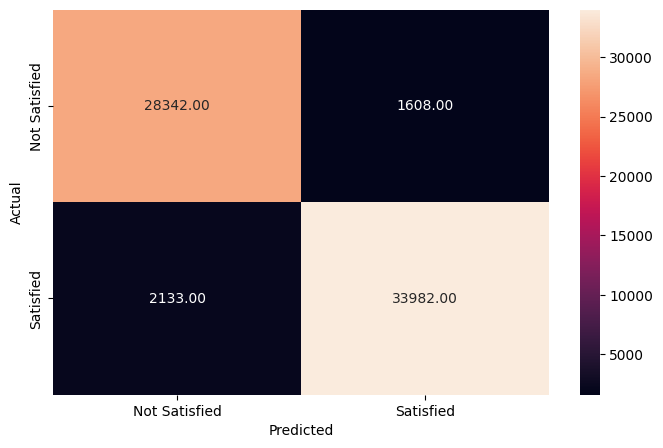

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12836
           1       0.94      0.94      0.94     15478

    accuracy                           0.94     28314
   macro avg       0.93      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



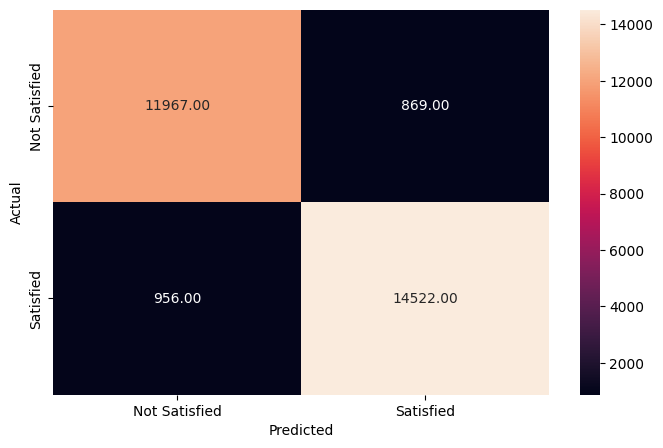

In [ ]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observations:**

*   The recall value originally was 0.93 has now seen an improvment to 0.94 in the tuned model
*   Precision on tuned model has also seen an improvment. From previously 0.93 to now , 0.94

# Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Checking performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



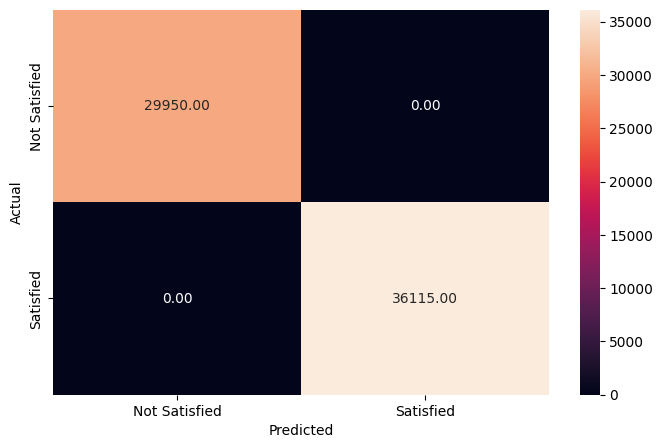

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Checking performance on the training data**

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12836
           1       0.95      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



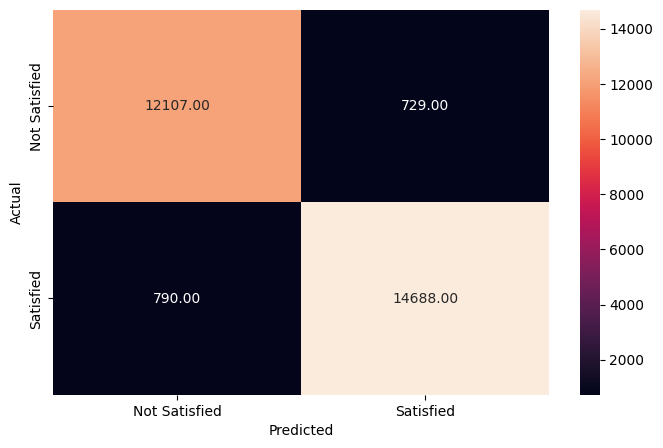

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

** Obsevations**


*   List item
*   List item



### **Data Preparation of test_df for model prediction**

In [ ]:
# Create copy of loaded test_df
test_df_copy = test_df.copy()

In [ ]:
# Creating dummy variables
test_df_copy = pd.get_dummies(data = test_df_copy, columns = to_get_dummies_for_test, drop_first = True)

In [ ]:
# Mapping survey
test_df_copy['Platform_Location']= test_df_copy.Platform_Location.map(dict_Platform_Location)
test_df_copy['Seat_Comfort']= test_df_copy.Seat_Comfort.map(dict_survey5)
test_df_copy['Arrival_Time_Convenient']= test_df_copy.Arrival_Time_Convenient.map(dict_survey5)
test_df_copy['Catering']= test_df_copy.Catering.map(dict_survey5)
test_df_copy['Onboard_Wifi_Service']= test_df_copy.Onboard_Wifi_Service.map(dict_survey5)
test_df_copy['Onboard_Entertainment']= test_df_copy.Onboard_Entertainment.map(dict_survey5)
test_df_copy['Online_Support']= test_df_copy.Online_Support.map(dict_survey5)
test_df_copy['Ease_of_Online_Booking']= test_df_copy.Ease_of_Online_Booking.map(dict_survey5)
test_df_copy['Onboard_Service']= test_df_copy.Onboard_Service.map(dict_survey5)
test_df_copy['Legroom']= test_df_copy.Legroom.map(dict_survey5)
test_df_copy['Baggage_Handling']= test_df_copy.Baggage_Handling.map(dict_Baggage_Handling)
test_df_copy['CheckIn_Service']= train_df_copy.CheckIn_Service.map(dict_survey5)
test_df_copy['Cleanliness']= test_df_copy.Cleanliness.map(dict_survey5)
test_df_copy['Online_Boarding']= test_df_copy.Online_Boarding.map(dict_survey5)

check that mapping and get dummies worked as it should

In [ ]:
#Drop ID feature in test_df_copy
test_df_copy = test_df_copy.drop(['ID'],axis=1)

In [ ]:
test_df_copy.head()

,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,...,Online_Boarding,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Class_Ordinary
0,NaN,NaN,NaN,NaN,2.0,5.0,4.0,5.0,5.0,5.0,...,1.0,36.0,532,0.0,0.0,False,False,False,False,False
1,0.0,4.0,1.0,NaN,NaN,1.0,NaN,NaN,5.0,NaN,...,NaN,21.0,1425,9.0,28.0,False,False,False,False,True
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,...,5.0,60.0,2832,0.0,0.0,True,True,False,False,True
3,NaN,5.0,NaN,5.0,1.0,NaN,5.0,1.0,NaN,2.0,...,1.0,29.0,1352,0.0,0.0,False,True,True,True,False
4,5.0,0.0,5.0,2.0,5.0,5.0,5.0,5.0,NaN,NaN,...,5.0,18.0,1610,17.0,0.0,True,False,False,False,True


**Make Prediction to test_df using the Tuned Decision Tree model**

In [ ]:
# make a prediction on the model
test_pred: np.array = rf_estimator.predict(test_df_copy).astype(int)

In [ ]:
# store the prediction in a dataframe.
test_pred_df: pd.DataFrame = pd.DataFrame(data = {'ID': survey_test['ID'], 'Overall_Experience' : test_pred})

In [ ]:
# Inspect the result
test_pred_df.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
# Specify the path where you want to save the file
# for now we save it in MyDrive as test_pred_df.csv
file_path = '/content/drive/MyDrive/test_pred_df_randomforest.csv'

# Save the DataFrame to the specified path
test_pred_df.to_csv(file_path, index=False)



In [ ]:
# convert the prediction to CSV

# wherever you will to store the csv, CHANGE
#file_path = 'content/drive/MyDrive'

#test_pred_df.to_csv(file_path, index=False)